In [1]:
import tensorflow_probability as tfp
import inferpy as inf

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.reset_default_graph()

d = 2
N = 2000

In [3]:
## P model definition: model + log_prob function

@inf.probmodel
def logregression(d, N, w_init=(1, 1), x_init=(0, 1)):


    w = inf.Normal(loc=np.ones(d) * w_init[0], scale=1. * w_init[1], name="w")
    w0 = inf.Normal(loc= 1.* w_init[0], scale=1. * w_init[1], name="w0")

    with inf.datamodel():
        x = inf.Normal(loc=np.ones(d) * x_init[0], scale=1. * x_init[1], name="x")
        y = inf.Bernoulli(logits =  tf.tensordot(x,w, axes=[[1],[0]]) + w0, name="y")

In [4]:
w_sampling = [2, 1]
w0_sampling = 0

m = logregression(d, N, x_init=(2,10))

training = m.prior(['x', 'y'], data={"w0": w0_sampling, "w": w_sampling}, size_datamodel=N).sample()
x_train = training['x']
y_train = training['y']

W1215 14:07:43.186851 4723701184 module_wrapper.py:139] From /Users/jcozar/dev/almeria/inferPy/InferPy/inferpy/models/prob_model.py:63: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1215 14:07:43.231216 4723701184 module_wrapper.py:139] From /Users/jcozar/dev/almeria/inferPy/InferPy/inferpy/util/interceptor.py:142: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.

W1215 14:07:43.282659 4723701184 module_wrapper.py:139] From /Users/jcozar/dev/almeria/inferPy/InferPy/inferpy/util/tf_graph.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1215 14:07:43.782149 4723701184 deprecation.py:323] From /Users/jcozar/dev/almeria/inferPy/InferPy/inferpy/contextmanager/evidence.py:15: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Prefer Variable.assign which has equivalent

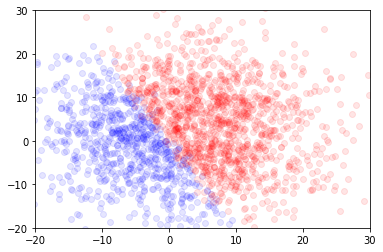

In [5]:
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], color='blue', alpha=0.1)
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], color='red', alpha=0.1)

plt.axis([-20, 30, -20, 30])
plt.show()

In [6]:
num_samples = 500

mcmc = inf.inference.MCMC()
m.fit(training, mcmc)

print(mcmc.states)

W1215 14:07:44.172730 4723701184 deprecation.py:323] From /Users/jcozar/dev/almeria/inferPy/InferPy/venv/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/Users/jcozar/dev/almeria/inferPy/InferPy/venv/lib/python3.6/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


{'w': <inf.RandomVariable (Empirical distribution) named w_11/, shape=(2,), dtype=float32>, 'w0': <inf.RandomVariable (Empirical distribution) named w0_11/, shape=(), dtype=float32>}


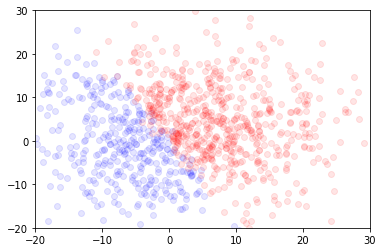

In [7]:
testing = m.posterior_predictive(['x', 'y']).sample(1000)

x_gen = testing['x']
y_gen = testing['y']

plt.scatter(x_gen[y_gen==0,0], x_gen[y_gen==0,1], color='blue', alpha=0.1)
plt.scatter(x_gen[y_gen==1,0], x_gen[y_gen==1,1], color='red', alpha=0.1)

plt.axis([-20, 30, -20, 30])
plt.show()